<a href="https://colab.research.google.com/github/snufka/PythonProject/blob/main/all_functions_and%20test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
%matplotlib inline

#Task 1-------------------------------------------------------------------------
#url= input ("Enter wiki url :")
#for easy testing
url= 'https://de.wikipedia.org/wiki/Wolfgang_Amadeus_Mozart'

def scraping_webpage(url): #web scraping function

    page=requests.get(url)

#getting the text and parsing it
    soup = BeautifulSoup(page.text, 'html.parser')

#The Wiki page Text
    text=[]
    text_body = soup.find_all(class_='mw-body')

    for item in text_body:
         text.append(item.text)
         
#Clean version of the text
    string =' '.join([str(item) for item in text]) 
    return string

my_fun = scraping_webpage(url)
print(my_fun)







Wolfgang Amadeus Mozart

aus Wikipedia, der freien Enzyklopädie



Zur Navigation springen
Zur Suche springen
      



Mozart ist eine Weiterleitung auf diesen Artikel. Weitere Bedeutungen sind unter Mozart (Begriffsklärung) aufgeführt.

 W. A. Mozart, Detail aus einem Gemälde von Johann Nepomuk della Croce (ca. 1781)

Wolfgang Amadeus Mozart, der überwiegend mit Wolfgang Amadé Mozart unterschrieb (* 27. Jänner 1756 in Salzburg,[1] Erzstift Salzburg, Heiliges Römisches Reich; † 5. Dezember 1791 in Wien,[2] Erzherzogtum Österreich, HRR), war ein Salzburger[3] Musiker und Komponist der Wiener Klassik. Sein umfangreiches Werk genießt weltweite Popularität und gehört zum Bedeutendsten im Repertoire klassischer Musik.

Inhaltsverzeichnis

1 Leben

1.1 Das Wunderkind (1756–1766)
1.2 Erste Kompositionen in Wien und die Italienreise (1766–1771)
1.3 Konzertmeister in Salzburg (1772–1777)
1.4 Auf Stellensuche und erneut Salzburg (1777–1781)
1.5 Freischaffender Komponist in Wien (1781–1791)

In [53]:
#Task 2-------------------------------------------------------------------------
def lang_in_url():
    split = url.split(".")

#Checking Language by subDomain;
    if split[0].find("en") == -1:
        print("*********Based on the URL, this page is in German**************")
  # elif (split[0].includes("en"))
   #     print("it's not english nor German, to find out more please visit https://en.wikipedia.org/wiki/List_of_Wikipedias#List")
    else: 
        print("*********Based on the URL, this page is in English*****************")
  
url_lang=lang_in_url()

*********Based on the URL, this page is in German**************


   Letter  Frequency Input 1
0       a               4164
1       b                737
2       c               1738
3       d               1673
4       e               5249
5       f               1058
6       g                941
7       h               1915
8       i               3671
9       j                119
10      k                350
11      l               2063
12      m               1826
13      n               3354
14      o               3774
15      p               1292
16      q                 60
17      r               3580
18      s               3243
19      t               3804
20      u               1344
21      v                463
22      w                816
23      x                 90
24      y                688
25      z                417
26      à                  1
27      ä                  6
28      æ                  2
29      è                  1
30      é                  5
31      ì                  3
32      í                  1
33      ö     

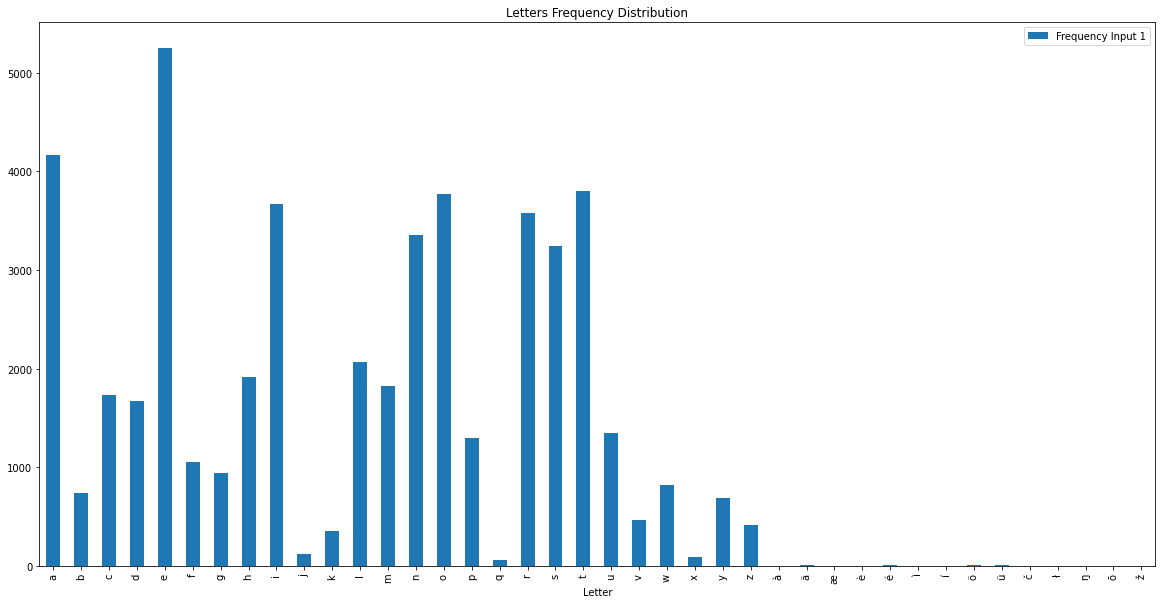

In [38]:
#TASK 3-------------------------------------------------------------------------
#list of only the letters, including german letters
def letters_frequency(my_fun):
     x = re.findall("[A-Za-zÀ-ȕ]", my_fun)

#turn it back to str to count frequency
     clean_str= ''.join([str(elem) for elem in x])

#frequency count
     freq = {} 
     for item in clean_str.lower(): 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1

#sorting dictinory alphabetically
     sortedDict = dict( sorted(freq.items(), key=lambda x: x[0].lower()) )
     return sortedDict

lff=letters_frequency(my_fun)

#the frequency table
df1=pd.DataFrame(lff.items(),columns=['Letter', 'Frequency Input 1'])
print(df1)

#The chart
df_reset=df1.set_index('Letter')
df_reset.plot.bar(figsize=(20,10),title='Letters Frequency Distribution')

   Letter  Frequency Input 1  Frequency Input 2
0       a             4164.0             8124.0
1       b              737.0             2868.0
2       c             1738.0             3196.0
3       d             1673.0             5910.0
4       e             5249.0            19837.0
5       f             1058.0             2207.0
6       g              941.0             3843.0
7       h             1915.0             4518.0
8       i             3671.0             9702.0
9       j              119.0              440.0
10      k              350.0             2644.0
11      l             2063.0             5317.0
12      m             1826.0             4215.0
13      n             3354.0            11345.0
14      o             3774.0             3938.0
15      p             1292.0             1693.0
16      q               60.0               20.0
17      r             3580.0            10475.0
18      s             3243.0             7534.0
19      t             3804.0            

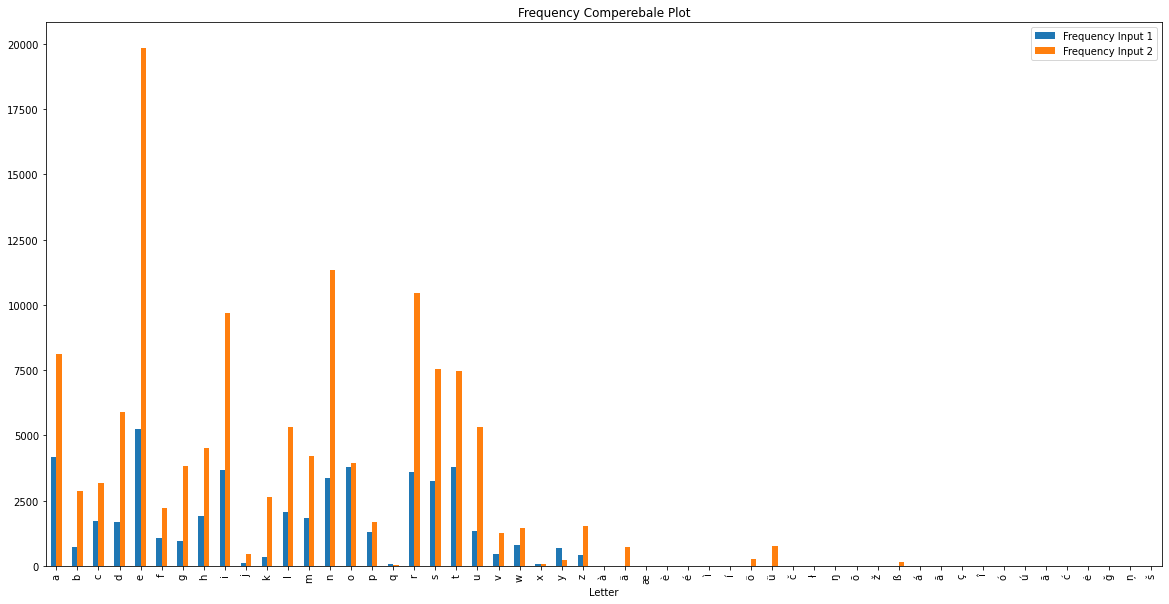

In [56]:
#Task 4 Plooting----------------------------------------------------------

url_2='https://de.wikipedia.org/wiki/Angela_Merkel'

page_2=requests.get(url_2)
secondtext=scraping_webpage(url_2)
#print(secondtext)

lff_2=letters_frequency(secondtext)
#print(lff_2)

df2=pd.DataFrame(lff_2.items(),columns=['Letter', 'Frequency Input 2'])
#print(df2)

def data_merging_chart():
    merged_table=pd.merge(df1, df2, on='Letter', how='outer')
    print(merged_table)
    df_reset=merged_table.set_index('Letter')
    df_reset.plot.bar(figsize=(20,10), title='Frequency Comperebale Plot')

merged_chart=data_merging_chart()
print(merged_chart)


In [59]:
# Task 5 & 6--------------------------------------------------------------------

def probability_german_text():
#count of letters sum
   values_char = lff.values()
   total_char= sum(values_char)
#print("Total number of letters in the text: {}".format(total_char))

#Counting German Letters and counting the percentage of the letter in the text
   germna_letters= ['ä', 'ö', 'ü', 'ß']
   german_char_dict = {k:lff[k] for k in germna_letters if k in lff}

   values_german_char = german_char_dict.values()
   total_german_char= sum(values_german_char)
   print(total_char) 
   print("Total number of German letter in the text: {}".format(total_german_char))

# Calculation of the % of the German latters of the text
   percentage_of_german_char= (total_german_char/total_char)*100
   round_percentage_of_german_char=round(percentage_of_german_char, 2)

   print("percentage of greman letter in the text: {}".format(round_percentage_of_german_char))

#Probablity that the text is in German----------
   if percentage_of_german_char >= 1:
      print("We are 100% sure that this text is in German! The frequency of special German characters is {}%!".format(round_percentage_of_german_char))
   
   elif percentage_of_german_char > 0.465 and percentage_of_german_char >= 1:
        print("The chance that this text is in German is 84.1% - 50.1%! The frequency of special German characters is {}%".format(round_percentage_of_german_char))

   elif percentage_of_german_char < 0.465 and percentage_of_german_char >= 0.348:
    print("The chance that this text is in German is 15.8% - 50%! The frequency of special German characters is {}%".format(round_percentage_of_german_char))

   elif percentage_of_german_char < 0.348 and percentage_of_german_char >= 0.2325:
    print("We are 97.7% - 84.2% sure that this text is not German! The frequency of special German characters is {}%".format(round_percentage_of_german_char))

   elif percentage_of_german_char < 0.2325 and percentage_of_german_char >= 0.116:
    print("We are 99.8% - 97.8% sure that this text is not German! The frequency of special German characters is {}%".format(round_percentage_of_german_char))

   else: 
    print("Not German! There is less than 0.1% that this text is in German! The frequency of special German characters is {}%".format(round_percentage_of_german_char))

probability_german_text()

48473
Total number of German letter in the text: 24
percentage of greman letter in the text: 0.05
Not German! There is less than 0.1% that this text is in German! The frequency of special German characters is 0.05%


In [44]:
#Testing
import pytest

def test_for_url_land():
  assert lang_in_url('https://de.wikipedia.org/wiki/Angela_Merkel')==('*********Based on the URL, this page is in German**************')
  
